In [92]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import re
import random
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes


### Read Data

In [93]:
df1 = pd.read_excel('data/DDS9_Data_Extract_with_labels.xlsx')
df2 = pd.read_excel('data/DDS10_Data_Extract_with_labels.xlsx')
df3 = pd.read_excel('data/DDS11_Data_Extract_with_labels.xlsx')

### Concatenated dataset for the common columns

In [94]:
df1cols = set(df1.columns)
df2cols = set(df2.columns)
df3cols = set(df3.columns)
common_cols = list(df1cols.intersection(df2cols).intersection(df3cols))
#print(len(common_cols))
merged_df = pd.concat([df1[common_cols], df2[common_cols], df3[common_cols]], ignore_index=True)
#merged_df

In [77]:
#print(df1.columns)

### Model 1: Relationship between household income and media/home entertainment equipment owned by a household

In [95]:
# Renaming column names for modeling
df1 = df1.rename(columns={"Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.":"household_income",
                        "Q8 - Which of the following media or home entertainment equipment does your household own?-Digital video recorder (DVR)":"DVR_owned",
                        "Q8 - Which of the following media or home entertainment equipment does your household own?-Flat panel television":"FlatTV_owned",
                        "Q8 - Which of the following media or home entertainment equipment does your household own?-Streaming media box or over-the-top box":"MediaBox_owned",
                        "Q8 - Which of the following media or home entertainment equipment does your household own?-Portable streaming thumb drive/fob":"Fob_owned",
                        "Q8 - Which of the following media or home entertainment equipment does your household own?-Blu-ray disc player/DVD player":"DVD_owned",
                        "Q8 - Which of the following media or home entertainment equipment does your household own?-Gaming console":"GamingCon_owned",
                        "Q8 - Which of the following media or home entertainment equipment does your household own?-Portable video game player":"PortableGame_owned",
                        "Q8 - Which of the following media or home entertainment equipment does your household own?-Computer network/router in your home for wireless computer/laptop usage":"Router_owned",
                        "Q8 - Which of the following media or home entertainment equipment does your household own?-Desktop computer":"Desktop_owned",
                        "Q8 - Which of the following media or home entertainment equipment does your household own?-Laptop computer":"Laptop_owned",
                        "Q8 - Which of the following media or home entertainment equipment does your household own?-Laptop/tablet hybrid":"LapTabHybrid_owned",
                        "Q8 - Which of the following media or home entertainment equipment does your household own?-Tablet (nine inches and above)":"Tab9in_owned",
                        "Q8 - Which of the following media or home entertainment equipment does your household own?-Small tablet (between seven and nine inches)":"Tab7_9in_owned",
                        "Q8 - Which of the following media or home entertainment equipment does your household own?-Dedicated e-book reader":"EbookReader_owned",
                        "Q8 - Which of the following media or home entertainment equipment does your household own?-Smartphone (three to five inches)":"Smartphone3_5in_owned",
                        "Q8 - Which of the following media or home entertainment equipment does your household own?-Large smartphone (between five and seven inches)":"LargeSmartphone_owned",
                        "Q8 - Which of the following media or home entertainment equipment does your household own?-Basic mobile phone (not a smartphone)":"BasicMobile_owned",
                        "Q8 - Which of the following media or home entertainment equipment does your household own?-Smart watch":"Smartwatch_owned",
                        "Q8 - Which of the following media or home entertainment equipment does your household own?-Fitness band":"FitnessBand_owned",
                        "Q8 - Which of the following media or home entertainment equipment does your household own?-Smart glasses":"SmartGlasses_owned",
                        "Q8 - Which of the following media or home entertainment equipment does your household own?-3D printer":"3DPrinter_owned",
                        "Q8 - Which of the following media or home entertainment equipment does your household own?-None of the above":"None_owned",
                        "Q8 - Which of the following media or home entertainment equipment does your household own?-Don't Know":"DontKnow_owned",
                        "region - Region":"resident_state"})
                
#df1.columns

In [96]:
# Setting up data for the model 
income_equipment_data = df1[['household_income', 'DVR_owned', 'FlatTV_owned', 'MediaBox_owned','Fob_owned','DVD_owned','GamingCon_owned','PortableGame_owned','Router_owned',
'Desktop_owned','Laptop_owned','LapTabHybrid_owned','Tab9in_owned','Tab7_9in_owned','EbookReader_owned','Smartphone3_5in_owned','LargeSmartphone_owned', 'BasicMobile_owned', 'Smartwatch_owned','FitnessBand_owned','SmartGlasses_owned','3DPrinter_owned','None_owned','DontKnow_owned']]

# Checking for missing values
#income_equipment_data.isnull().any()

# Converting income ranges to numerical values via one-hot encoding based on the assumption that these categories are nominal and not ordinal
# income_mapping = {
#     'Less than $29,999': 1,
#     '$30,000 to $49,999': 2,
#     '$50,000 to $99,999': 3,
#     '$100,000 to $299,999': 4,
#     'More than $300,000': 5,
#     'Do not know': 0
# }

# income_equipment_data['Income_Num'] = income_equipment_data['household_income'].map(income_mapping)

# # Perform one-hot encoding
# one_hot_encoded = pd.get_dummies(income_equipment_data['Income_Num'], prefix='Income')

# # Concatenate the one-hot encoded columns with your original DataFrame
# income_equipment_data = pd.concat([income_equipment_data, one_hot_encoded], axis=1)

# # Encoding equipment columns

# equipment_columns = ['DVR_owned', 'FlatTV_owned', 'MediaBox_owned', 'Fob_owned', 'DVD_owned', 'GamingCon_owned', 'PortableGame_owned', 'Router_owned',
#     'Desktop_owned', 'Laptop_owned', 'LapTabHybrid_owned', 'Tab9in_owned', 'Tab7_9in_owned', 'EbookReader_owned', 'Smartphone3_5in_owned', 'LargeSmartphone_owned', 
#     'BasicMobile_owned', 'Smartwatch_owned', 'FitnessBand_owned', 'SmartGlasses_owned', '3DPrinter_owned', 'None_owned', 'DontKnow_owned']

# # Convert 'Yes' and 'No' to 1 and 0 for all columns
# for column in equipment_columns:
#     income_equipment_data[column] = income_equipment_data[column].map({'Yes': 1, 'No': 0})

# # Dropping original income column (it is non-numeric)
# income_equipment_data.drop('household_income', axis=1, inplace=True)


In [80]:
# # Standardizing data
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(income_equipment_data)

# # K-means clustering
# kmeans = KMeans(n_clusters=5, random_state=42)  
# cluster_labels = kmeans.fit_predict(scaled_data)

# # Add the cluster labels 
# income_equipment_data['Cluster'] = cluster_labels

income_equipment = income_equipment_data.copy()

# Initializing KModes clustering
k_modes = KModes(n_clusters=5, init='Huang', n_init=5, verbose=1)

# Fitting the data
clusters = k_modes.fit_predict(income_equipment)

# Adding cluster labels to the original DataFrame
income_equipment['Cluster'] = clusters

# Cluster distribution
print(income_equipment['Cluster'].value_counts())

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 753, cost: 8314.0
Run 1, iteration: 2/100, moves: 97, cost: 8314.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 657, cost: 8447.0
Run 2, iteration: 2/100, moves: 331, cost: 8327.0
Run 2, iteration: 3/100, moves: 56, cost: 8327.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 823, cost: 8482.0
Run 3, iteration: 2/100, moves: 320, cost: 8364.0
Run 3, iteration: 3/100, moves: 51, cost: 8364.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 600, cost: 8330.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 557, cost: 8465.0
Run 5, iteration: 2/100, moves: 2, cost: 8465.0
Best run was number 1
Cluster
3    512
1    506
0    38

1. Cluster Profiles - Examining Modes
The cluster profiles involve finding the most common value (mode) for each categorical variable within each cluster. 

In [81]:
# Group by cluster and finding  mode for each variable
cluster_profiles = income_equipment.groupby('Cluster').agg(lambda x: x.value_counts().index[0])

print(cluster_profiles)

           household_income DVR_owned FlatTV_owned MediaBox_owned Fob_owned  \
Cluster                                                                       
0        $30,000 to $49,999       Yes          Yes             No        No   
1        $50,000 to $99,999        No          Yes             No        No   
2         Less than $29,999        No          Yes             No        No   
3         Less than $29,999        No          Yes             No        No   
4        $50,000 to $99,999       Yes          Yes             No        No   

        DVD_owned GamingCon_owned PortableGame_owned Router_owned  \
Cluster                                                             
0             Yes             Yes                 No          Yes   
1             Yes              No                 No          Yes   
2              No             Yes                 No          Yes   
3              No              No                 No           No   
4             Yes             Ye

In [131]:
# # View cluster centroids (modes) for each categorical feature
# cluster_centroids = k_modes.cluster_centroids_
# print(cluster_centroids)

Visualizing Clusters:
Count of income categories within the clusters.

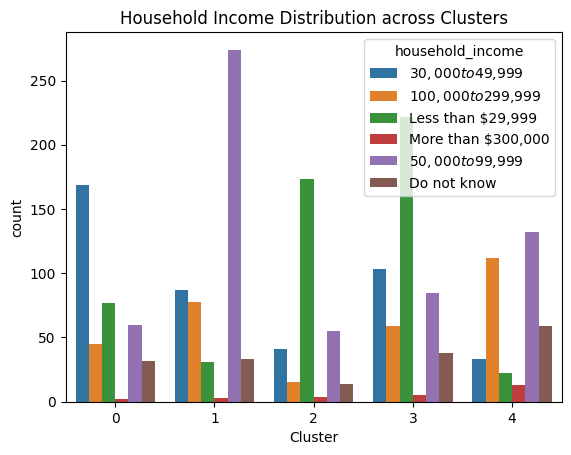

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Cluster', hue='household_income', data=income_equipment)  # We can change the coloumn visualzied here
plt.title('Household Income Distribution across Clusters')
plt.show()

3. Silhouette score : 
The silhouette score can be used to evaluate the quality of the clustering. I ahve done by converting categorical columns into numerical labels using LabelEncoder and then calculated the silhouette score.



In [84]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score

# Initialize a label encoder
label_encoder = LabelEncoder()

# Encode categorical columns
encoded_data = income_equipment.copy()  

for column in encoded_data.columns:
    if encoded_data[column].dtype == 'object':  
        encoded_data[column] = label_encoder.fit_transform(encoded_data[column])

# Drop the 'Cluster' column to avoid leakage in silhouette score calculation
encoded_data.drop('Cluster', axis=1, inplace=True)

# Calculate silhouette score
silhouette_avg = silhouette_score(encoded_data, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.028497011106059532


A score of 0.020 means that the clustering has a very low separation and cohesion, suggesting that the clusters are not well-defined or significantly different from each other. It implies that the data points are quite similar within clusters and/or there's a considerable overlap between clusters.

4. Characteristics of Each Cluster:
To analyze the characteristics of each cluster, filter the dataset by cluster labels and examine the distribution of categorical features.

In [133]:
# Change 'cluster_number' to the desired cluster
cluster_number = 1
cluster_data = income_equipment_data[income_equipment['Cluster'] == cluster_number]

print(cluster_data.describe())

          household_income DVR_owned FlatTV_owned MediaBox_owned Fob_owned  \
count                  506       506          506            506       506   
unique                   6         2            2              2         2   
top     $50,000 to $99,999        No          Yes             No        No   
freq                   274       371          399            426       465   

       DVD_owned GamingCon_owned PortableGame_owned Router_owned  \
count        506             506                506          506   
unique         2               2                  2            2   
top          Yes              No                 No          Yes   
freq         357             395                454          349   

       Desktop_owned  ... EbookReader_owned Smartphone3_5in_owned  \
count            506  ...               506                   506   
unique             2  ...                 2                     2   
top              Yes  ...                No                  

### Adding region because states are too many

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 741, cost: 9836.0
Run 1, iteration: 2/100, moves: 340, cost: 9789.0
Run 1, iteration: 3/100, moves: 85, cost: 9789.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 690, cost: 9551.0
Run 2, iteration: 2/100, moves: 68, cost: 9551.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 629, cost: 9578.0
Run 3, iteration: 2/100, moves: 220, cost: 9513.0
Run 3, iteration: 3/100, moves: 65, cost: 9513.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 570, cost: 9962.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 808, cost: 9755.0
Run 5, iteration: 2/100, moves: 342, cost: 9755.0
Best run was number 3
Cluster
0    580
2    509
1    

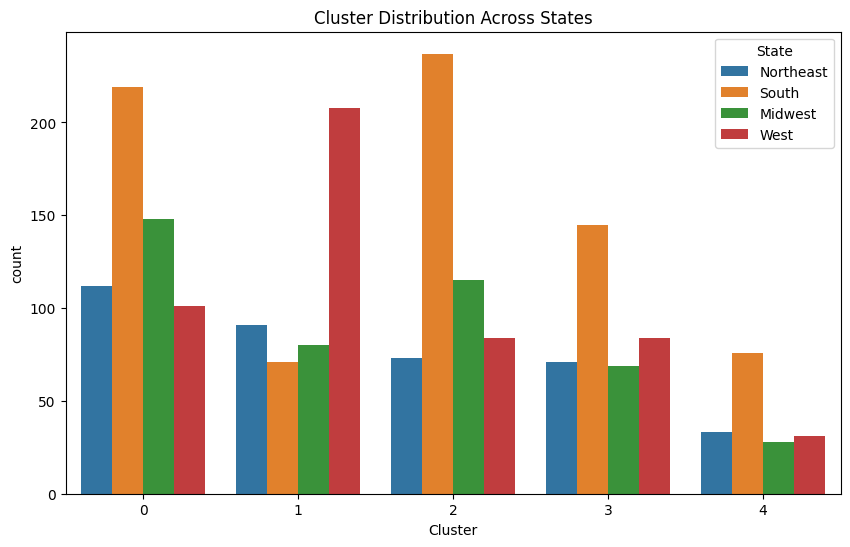

In [103]:
# Combining region column with existing data
income_equipment_data_with_state = income_equipment_data.copy()  
income_equipment_data_with_state['State'] = df1['resident_state']

# Initialize KModes clustering
k_modes = KModes(n_clusters=5, init='Huang', n_init=5, verbose=1)

# Fitting the data
clusters = k_modes.fit_predict(income_equipment_data_with_state)

# Adding cluster labels 
income_equipment_data_with_state['Cluster'] = clusters

# Cluster distribution
print(income_equipment_data_with_state['Cluster'].value_counts())

# Analyze clusters with regions
cluster_states = income_equipment_data_with_state.groupby('Cluster')['State'].value_counts()
print(cluster_states)  

# Countplot showing the distribution of states within clusters
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=income_equipment_data_with_state, x='Cluster', hue='State')
plt.title('Cluster Distribution Across Regions')
plt.show()

In [124]:
# Analyze mode (most frequent value) for each feature within clusters
cluster_modes = income_equipment_data_with_state.groupby('Cluster').agg(lambda x: x.value_counts().index[0])

print("Cluster Modes:")
print(cluster_modes)

Cluster Modes:
             household_income DVR_owned FlatTV_owned MediaBox_owned Fob_owned  \
Cluster                                                                         
0           Less than $29,999        No          Yes             No        No   
1          $50,000 to $99,999        No          Yes             No        No   
2           Less than $29,999        No          Yes             No        No   
3        $100,000 to $299,999       Yes          Yes            Yes        No   
4          $30,000 to $49,999       Yes          Yes             No        No   

        DVD_owned GamingCon_owned PortableGame_owned Router_owned  \
Cluster                                                             
0              No              No                 No           No   
1              No              No                 No           No   
2             Yes             Yes                 No          Yes   
3             Yes             Yes                 No          Yes   
4  

bar plots showing the mode values of the specified column for each cluster

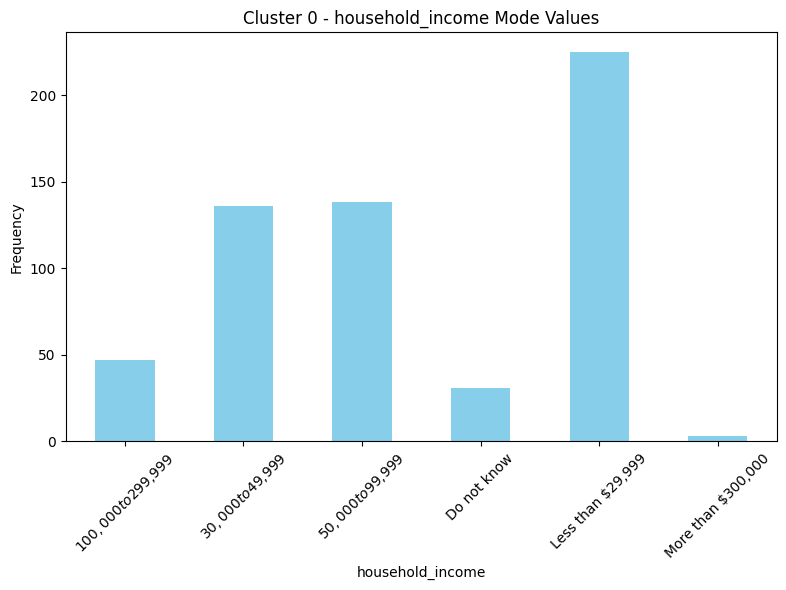

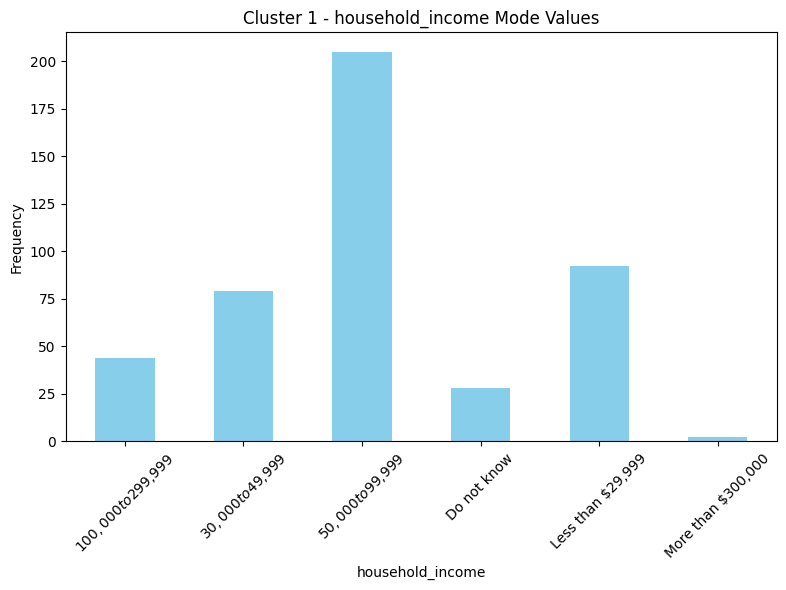

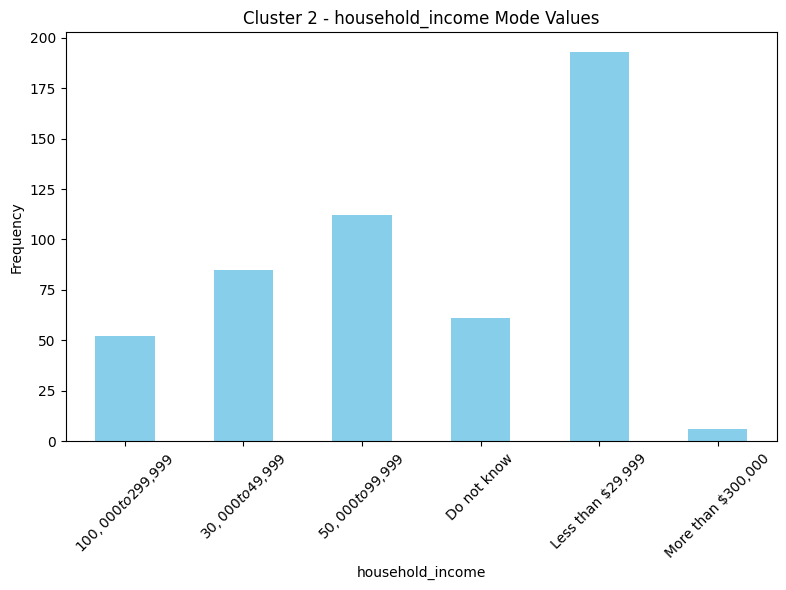

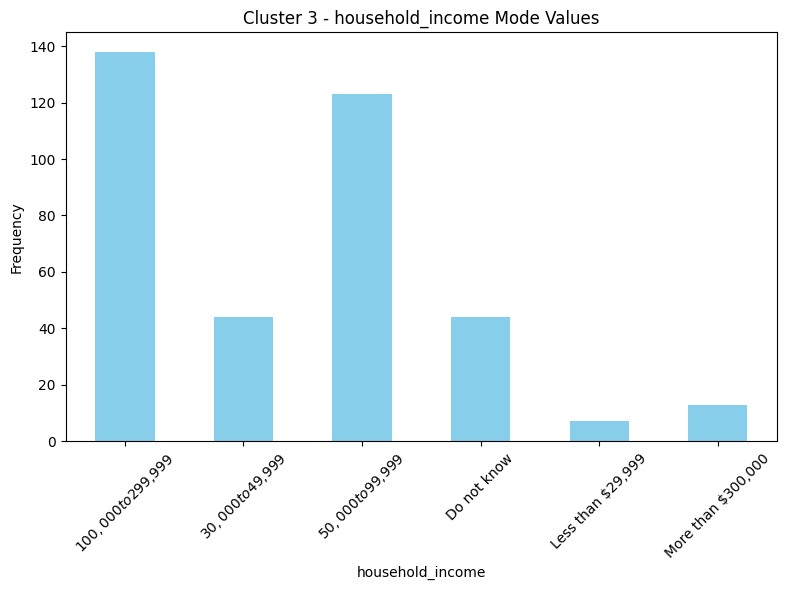

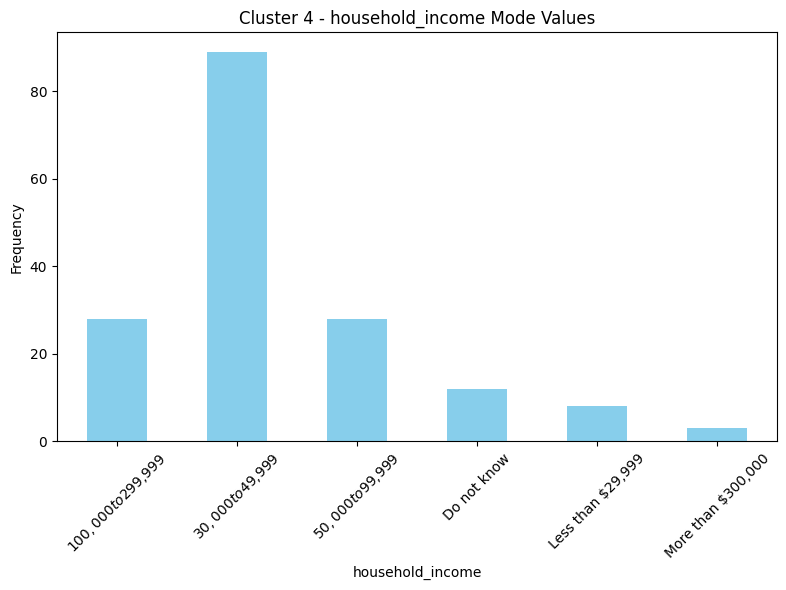

In [130]:
# Pick a column to visualize
column_name = 'household_income'

# Count occurrences of each value within each cluster
cluster_column_counts = income_equipment_data_with_state.groupby(['Cluster', column_name]).size().unstack()

# Plotting bar plots for each cluster's mode values
for cluster in cluster_column_counts.index:
    values = cluster_column_counts.loc[cluster]
    plt.figure(figsize=(8, 6))
    values.plot(kind='bar', color='skyblue')
    plt.title(f'Cluster {cluster} - {column_name} Mode Values')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

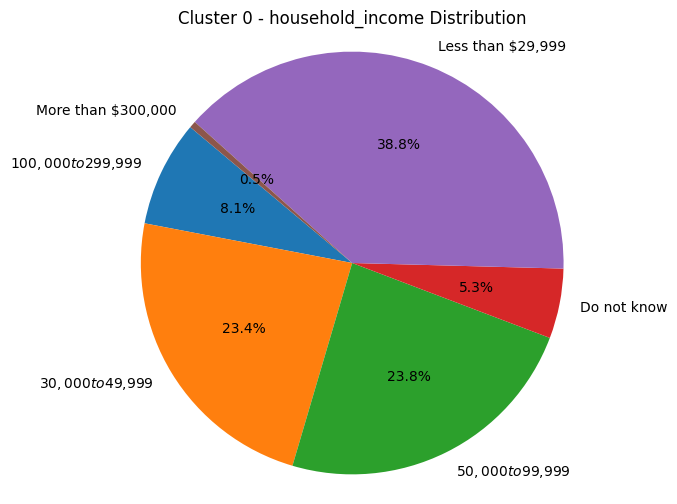

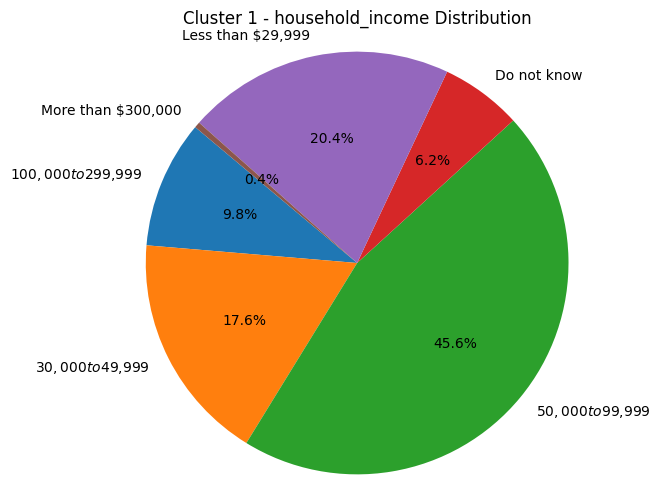

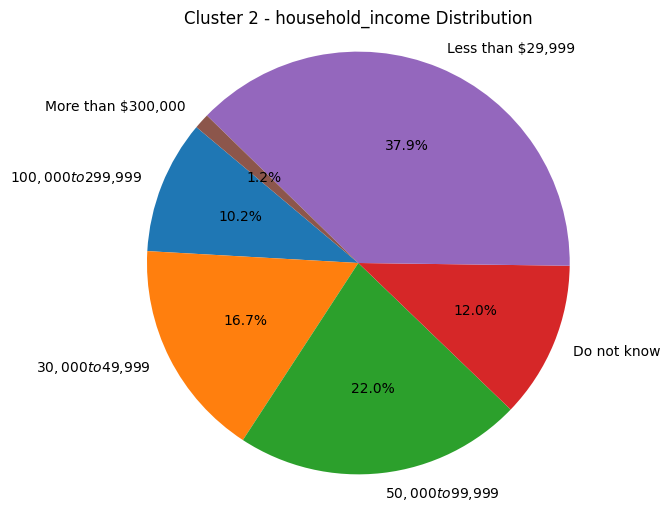

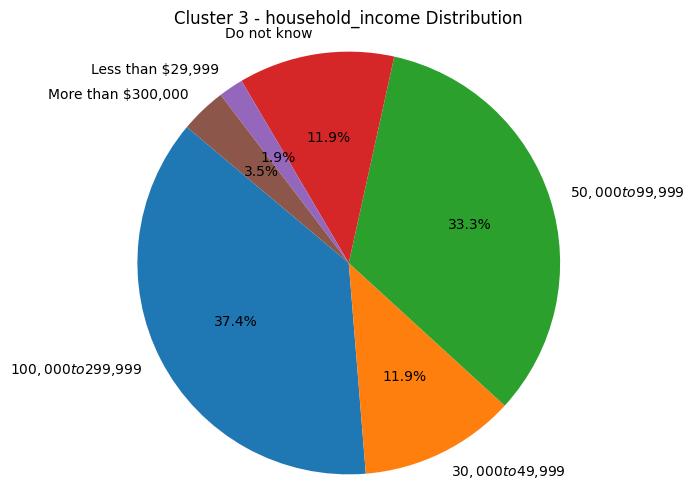

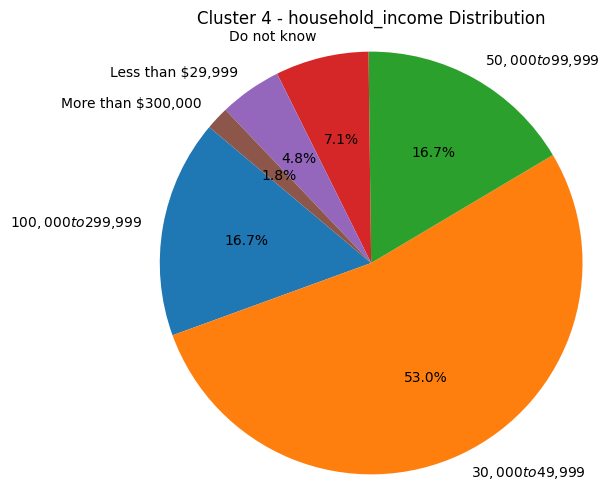

In [105]:
# Replace with desired column
column_name = 'household_income'

# Count occurrences of each value within each cluster
cluster_column_counts = income_equipment_data_with_state.groupby(['Cluster', column_name]).size().unstack()

# Plotting pie charts for each cluster
for cluster in cluster_column_counts.index:
    values = cluster_column_counts.loc[cluster]
    plt.figure(figsize=(6, 6))
    plt.pie(values, labels=values.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Cluster {cluster} - {column_name} Distribution')
    plt.axis('equal')  
    plt.show()

Cross-Tabulation of Device Ownership Pairwise in Clusters:
Here, the cross-tabulation (cross_tab) represents the joint distribution of DVR and FlatTV ownership within each cluster separately. It breaks down the ownership patterns, showing how many households in each cluster have both DVRs and Flat TVs, giving a more detailed view of ownership combinations within clusters.

The following approach focuses on comparing ownership of multiple devices (DVR and FlatTV) simultaneously within each cluster (Cluster).
It helps to identify co-ownership patterns and how multiple devices' ownership differs across clusters.
This might provide a broader perspective on how different devices are commonly owned together within each cluster, potentially indicating distinct preferences or behaviors characterizing each cluster.

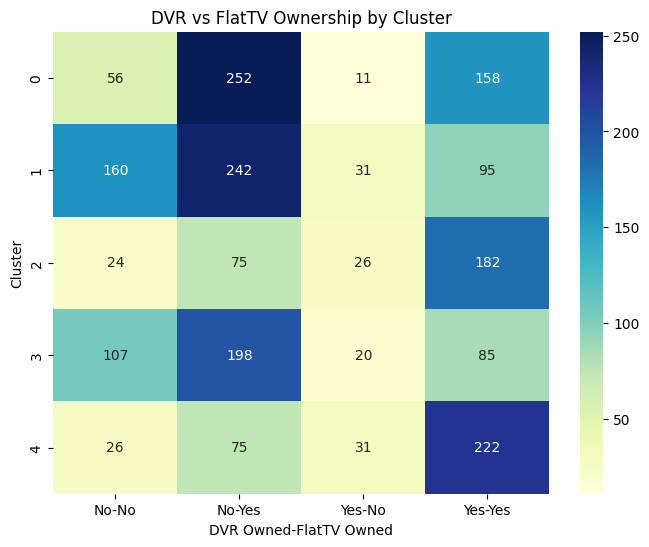

In [ ]:
# Selecting the relevant columns for cross-tabulation
selected_columns = ['Cluster', 'DVR_owned', 'FlatTV_owned']  

# Creating the cross-tabulation
cross_tab = pd.crosstab(income_equipment_data_with_state['Cluster'], 
                        [income_equipment_data_with_state['DVR_owned'], income_equipment_data_with_state['FlatTV_owned']],
                        rownames=['Cluster'], colnames=['DVR Owned', 'FlatTV Owned'])

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')
plt.title('DVR vs FlatTV Ownership by Cluster')
plt.show()

### For business insights purposes

Cluster Centers/Prototypes: For KModes, the "cluster center" represents the mode of each categorical variable within a cluster. To understand the dominant characteristics of each cluster.

In [102]:
income_equipment_data_with_state.columns

Index(['household_income', 'DVR_owned', 'FlatTV_owned', 'MediaBox_owned',
       'Fob_owned', 'DVD_owned', 'GamingCon_owned', 'PortableGame_owned',
       'Router_owned', 'Desktop_owned', 'Laptop_owned', 'LapTabHybrid_owned',
       'Tab9in_owned', 'Tab7_9in_owned', 'EbookReader_owned',
       'Smartphone3_5in_owned', 'LargeSmartphone_owned', 'BasicMobile_owned',
       'Smartwatch_owned', 'FitnessBand_owned', 'SmartGlasses_owned',
       '3DPrinter_owned', 'None_owned', 'DontKnow_owned', 'State', 'Cluster'],
      dtype='object')

Cross-Tabulation of Device Ownership and Clusters:
This cross-tabulation (cross_tab) showcases the count or frequency of DVR ownership across different clusters. It illustrates how many households within each cluster own DVRs, providing an overall view of device ownership per cluster.

This can help understand if there's a distinct pattern where ownership of a particular device significantly differs or is more prominent in certain clusters.


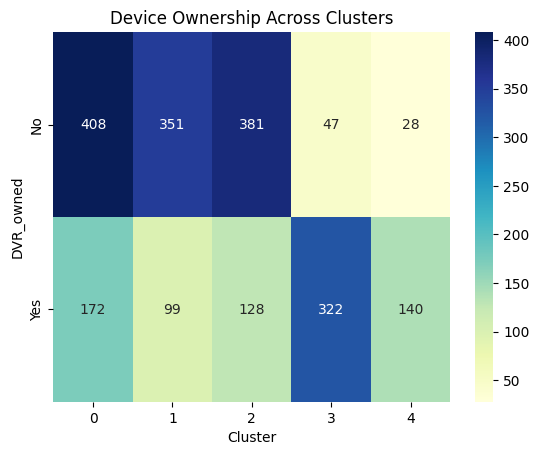

In [108]:
cross_tab = pd.crosstab(income_equipment_data_with_state['DVR_owned'], income_equipment_data_with_state['Cluster'])

# Visualize 
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Device Ownership Across Clusters')
plt.show()

In [ ]:
# # Analyze clusters
# cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)  # Reverse scaling to interpret cluster centers

# print("Cluster Centers:")
# print(cluster_centers)

# # Data distribution among clusters
# print("Data Distribution in Clusters:")
# print(income_equipment_data['Cluster'].value_counts())

# # Visualize the clusters with 2 features
# plt.figure(figsize=(8, 6))
# plt.scatter(income_equipment_data['Income_Num'], income_equipment_data['DVR_owned'], c=cluster_labels, cmap='viridis')
# plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=100, c='red', label='Cluster Centers')
# plt.xlabel('Household Income')
# plt.ylabel('Equipment DVR_owned')
# plt.title('K-means Clustering of Household Income vs Entertainment Equipment')
# plt.legend()
# plt.show()

In [ ]:
# print(income_equipment_data.columns)


In [ ]:
# # A grouped bar chart showing the mean ownership of different equipment types across the clusters
# # Mean ownership of equipment within each cluster
# cluster_means = income_equipment_data.groupby('Cluster').mean().reset_index()


# # Plotting - for some reason seaborn is failing 
# equipment = cluster_means.drop(['Cluster', 'Income_Num'], axis=1).columns
# cluster_0_means = cluster_means.drop(['Cluster', 'Income_Num'], axis=1).iloc[0].values
# cluster_1_means = cluster_means.drop(['Cluster', 'Income_Num'], axis=1).iloc[1].values
# cluster_2_means = cluster_means.drop(['Cluster', 'Income_Num'], axis=1).iloc[2].values
# cluster_3_means = cluster_means.drop(['Cluster', 'Income_Num'], axis=1).iloc[3].values
# cluster_4_means = cluster_means.drop(['Cluster', 'Income_Num'], axis=1).iloc[4].values

# num_clusters = len(cluster_means)


# bar_width = 0.15

# r1 = np.arange(len(equipment))
# r2 = [x + bar_width for x in r1]
# r3 = [x + bar_width for x in r2]
# r4 = [x + bar_width for x in r3]
# r5 = [x + bar_width for x in r4]

# plt.figure(figsize=(12, 6))
# plt.bar(r1, cluster_0_means, color='b', width=bar_width, edgecolor='grey', label='Cluster 0')
# plt.bar(r2, cluster_1_means, color='g', width=bar_width, edgecolor='grey', label='Cluster 1')
# plt.bar(r3, cluster_2_means, color='r', width=bar_width, edgecolor='grey', label='Cluster 2')
# plt.bar(r4, cluster_3_means, color='c', width=bar_width, edgecolor='grey', label='Cluster 3')
# plt.bar(r5, cluster_4_means, color='m', width=bar_width, edgecolor='grey', label='Cluster 4')

# plt.xlabel('Equipment', fontweight='bold')
# plt.ylabel('Mean Ownership', fontweight='bold')
# plt.xticks([r + bar_width * (num_clusters / 2) for r in range(len(equipment))], equipment, rotation=90)
# plt.title('Mean Equipment Ownership by Cluster', fontweight='bold')
# plt.legend()

# plt.tight_layout()
# plt.show()